Household final consumption expenditure

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Setting up pathway of data and reading it
csv_path = Path("Resource/123.csv")
df = pd.read_csv(csv_path)
df.head()

,REF_DATE,GEO,DGUID,Prices,Seasonal adjustment,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961-01,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,37146,NaN,NaN,NaN,0
1,1961-04,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,38476,NaN,NaN,NaN,0
2,1961-07,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,38871,NaN,NaN,NaN,0
3,1961-10,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,38446,NaN,NaN,NaN,0
4,1962-01,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,39497,NaN,NaN,NaN,0


In [3]:
# Assume df is your DataFrame and 'date' is your column with dates
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%Y-%m')

df["REF_YEAR"] = df["REF_DATE"].dt.year

clean_df = df.groupby(['REF_YEAR', 'Estimates']).sum()


In [4]:
#Resetting the index
clean_df.reset_index(inplace=True)

In [5]:
#Checking the data
clean_df

,REF_YEAR,Estimates,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961,"Alcoholic beverages, tobacco and cannabis [C12]",324,24,59899,0.0,0.0,0.0,0
1,1961,Clothing and footwear [C13],324,24,31637,0.0,0.0,0.0,0
2,1961,Communications [C18],324,24,4147,0.0,0.0,0.0,0
3,1961,Education [C21],324,24,7312,0.0,0.0,0.0,0
4,1961,Food and non-alcoholic beverages [C11],324,24,152939,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
940,2023,Insurance and financial services [C23],81,6,124753,0.0,0.0,0.0,0
941,2023,Miscellaneous goods and services [C24],81,6,64466,0.0,0.0,0.0,0
942,2023,Net expenditure abroad [C25],81,6,1504,0.0,0.0,0.0,0
943,2023,Recreation and culture [C19],81,6,104858,0.0,0.0,0.0,0


Setting up for Expenses over the years

In [6]:
#Delete extraneous coolumn-p
clean_df[["REF_YEAR","Estimates","VALUE"]].head(20)

,REF_YEAR,Estimates,VALUE
0,1961,"Alcoholic beverages, tobacco and cannabis [C12]",59899
1,1961,Clothing and footwear [C13],31637
2,1961,Communications [C18],4147
3,1961,Education [C21],7312
4,1961,Food and non-alcoholic beverages [C11],152939
5,1961,"Food, beverage and accommodation services [C22]",84105
6,1961,"Furnishings, household equipment and other goo...",33064
7,1961,Health [C16],29625
8,1961,Household final consumption expenditure [C],749193
9,1961,"Housing, water, electricity, gas and other fue...",247124


In [7]:
#rename the columns-p
rename_clean_df =clean_df.rename(columns={"REF_YEAR":"YEAR" , "Estimates": "Expenditures_(Millions_Dallars)"})
rename_clean_df

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961,"Alcoholic beverages, tobacco and cannabis [C12]",324,24,59899,0.0,0.0,0.0,0
1,1961,Clothing and footwear [C13],324,24,31637,0.0,0.0,0.0,0
2,1961,Communications [C18],324,24,4147,0.0,0.0,0.0,0
3,1961,Education [C21],324,24,7312,0.0,0.0,0.0,0
4,1961,Food and non-alcoholic beverages [C11],324,24,152939,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
940,2023,Insurance and financial services [C23],81,6,124753,0.0,0.0,0.0,0
941,2023,Miscellaneous goods and services [C24],81,6,64466,0.0,0.0,0.0,0
942,2023,Net expenditure abroad [C25],81,6,1504,0.0,0.0,0.0,0
943,2023,Recreation and culture [C19],81,6,104858,0.0,0.0,0.0,0


In [8]:
#Delete extraneous coolumn-p
rename_clean_df[["YEAR","Expenditures_(Millions_Dallars)","VALUE"]].tail(20)

,YEAR,Expenditures_(Millions_Dallars),VALUE
925,2022,Insurance and financial services [C23],509040
926,2022,Miscellaneous goods and services [C24],255727
927,2022,Net expenditure abroad [C25],492
928,2022,Recreation and culture [C19],407300
929,2022,Transport [C17],651906
930,2023,"Alcoholic beverages, tobacco and cannabis [C12]",42140
931,2023,Clothing and footwear [C13],59496
932,2023,Communications [C18],41002
933,2023,Education [C21],20224
934,2023,Food and non-alcoholic beverages [C11],106825


In [9]:
# Expense items-p
expense_items=rename_clean_df["Expenditures_(Millions_Dallars)"].unique()
expense_items

array(['Alcoholic beverages,  tobacco and cannabis [C12]',
       'Clothing and footwear [C13]', 'Communications [C18]',
       'Education [C21]', 'Food and non-alcoholic beverages [C11]',
       'Food, beverage and accommodation services [C22]',
       'Furnishings, household equipment and other goods and services related to the dwelling and property [C15]',
       'Health [C16]', 'Household final consumption expenditure [C]',
       'Housing, water, electricity, gas and other fuels [C14]',
       'Insurance and financial services [C23]',
       'Miscellaneous goods and services [C24]',
       'Net expenditure abroad [C25]', 'Recreation and culture [C19]',
       'Transport [C17]'], dtype=object)

Alchohol

In [10]:
#Alcoholic beverages,  tobacco and cannabis [C12]-p
Expenses_C12  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Alcoholic beverages,  tobacco and cannabis [C12]", ]
Expenses_C12[["YEAR","Expenditures_(Millions_Dallars)","VALUE"]]

,YEAR,Expenditures_(Millions_Dallars),VALUE
0,1961,"Alcoholic beverages, tobacco and cannabis [C12]",59899
15,1962,"Alcoholic beverages, tobacco and cannabis [C12]",63418
30,1963,"Alcoholic beverages, tobacco and cannabis [C12]",66918
45,1964,"Alcoholic beverages, tobacco and cannabis [C12]",69573
60,1965,"Alcoholic beverages, tobacco and cannabis [C12]",76114
...,...,...,...
870,2019,"Alcoholic beverages, tobacco and cannabis [C12]",162677
885,2020,"Alcoholic beverages, tobacco and cannabis [C12]",171243
900,2021,"Alcoholic beverages, tobacco and cannabis [C12]",173929
915,2022,"Alcoholic beverages, tobacco and cannabis [C12]",171608


In [11]:
# Plot graph :Alcoholic beverages,  tobacco and cannabis [C12]
Year_Expenses_C12 = Expenses_C12[["YEAR","VALUE"]]
Year_Expenses_C12=Year_Expenses_C12.set_index("YEAR")
Year_Expenses_C12


,VALUE
YEAR,
1961,59899
1962,63418
1963,66918
1964,69573
1965,76114
...,...
2019,162677
2020,171243
2021,173929


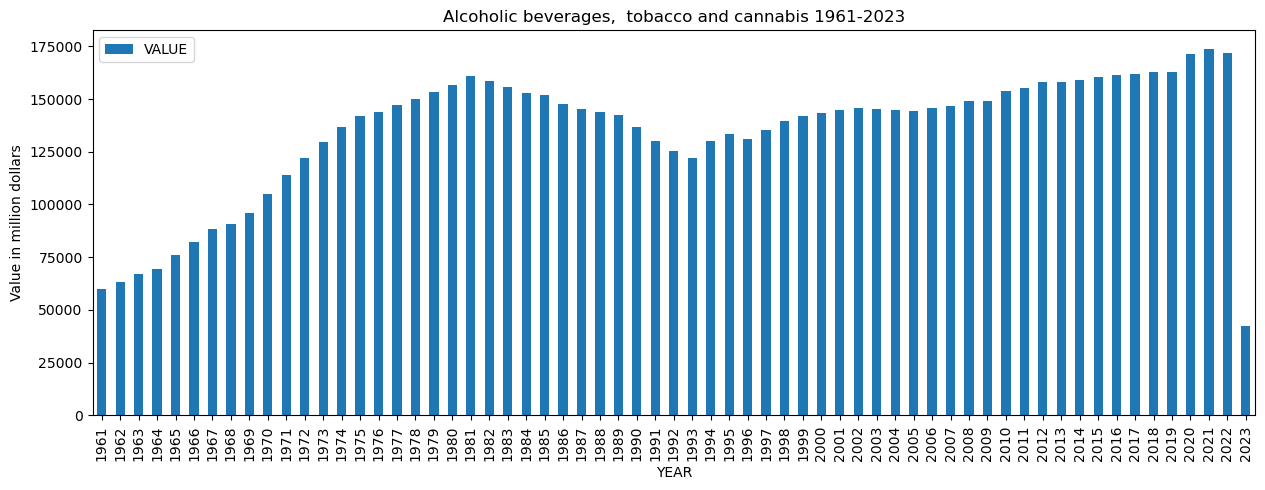

<Figure size 640x480 with 0 Axes>

In [12]:
# Plot graph :Alcoholic beverages,  tobacco and cannabis [C12]

Year_Expenses_C12.plot(kind="bar", figsize=(15,5))

# Set a title for the chart
plt.title("Alcoholic beverages,  tobacco and cannabis 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
matplotlib.style.use('fivethirtyeight')
plt.savefig("Year_Expenses_C12.png", bbox_inches="tight")
plt.show()
plt.tight_layout()


Communications

In [13]:
#Communications [C18]
Expenses_C18  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Communications [C18]", ]
Expenses_C18      

Year_Expenses_C18 = Expenses_C18[["YEAR","VALUE"]]
Year_Expenses_C18=Year_Expenses_C18.set_index("YEAR")
Year_Expenses_C18


,VALUE
YEAR,
1961,4147
1962,4418
1963,4711
1964,5057
1965,5324
...,...
2019,133951
2020,138396
2021,149066


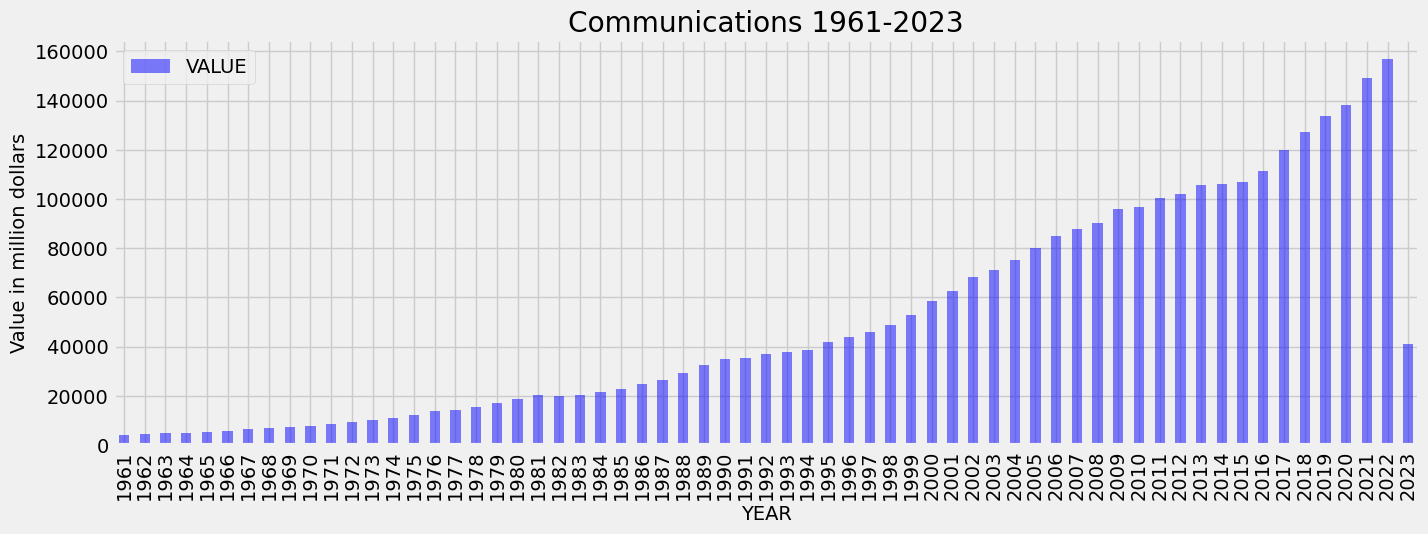

<Figure size 640x480 with 0 Axes>

In [14]:
#Plot Communications 

Year_Expenses_C18.plot(kind="bar", figsize=(15,5),color="b",alpha=0.5)

# Set a title for the chart
plt.title("Communications 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C18.png", bbox_inches="tight")
plt.show()
plt.tight_layout()




Clothings

In [15]:
#Clothing and footwear [C13]
Expenses_C13  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Clothing and footwear [C13]", ]
Expenses_C13

,YEAR,Expenditures_(Millions_Dallars),UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1,1961,Clothing and footwear [C13],324,24,31637,0.0,0.0,0.0,0
16,1962,Clothing and footwear [C13],324,24,33765,0.0,0.0,0.0,0
31,1963,Clothing and footwear [C13],324,24,34746,0.0,0.0,0.0,0
46,1964,Clothing and footwear [C13],324,24,35842,0.0,0.0,0.0,0
61,1965,Clothing and footwear [C13],324,24,37640,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
871,2019,Clothing and footwear [C13],324,24,201448,0.0,0.0,0.0,0
886,2020,Clothing and footwear [C13],324,24,163667,0.0,0.0,0.0,0
901,2021,Clothing and footwear [C13],324,24,193730,0.0,0.0,0.0,0
916,2022,Clothing and footwear [C13],324,24,224931,0.0,0.0,0.0,0


In [16]:
#Education [C21]
Expenses_C21  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Education [C21]", ]
Expenses_C21

Year_Expenses_C21 = Expenses_C21[["YEAR","VALUE"]]
Year_Expenses_C21=Year_Expenses_C21.set_index("YEAR")
Year_Expenses_C21



,VALUE
YEAR,
1961,7312
1962,7650
1963,8242
1964,8802
1965,9303
...,...
2019,77016
2020,75572
2021,76364


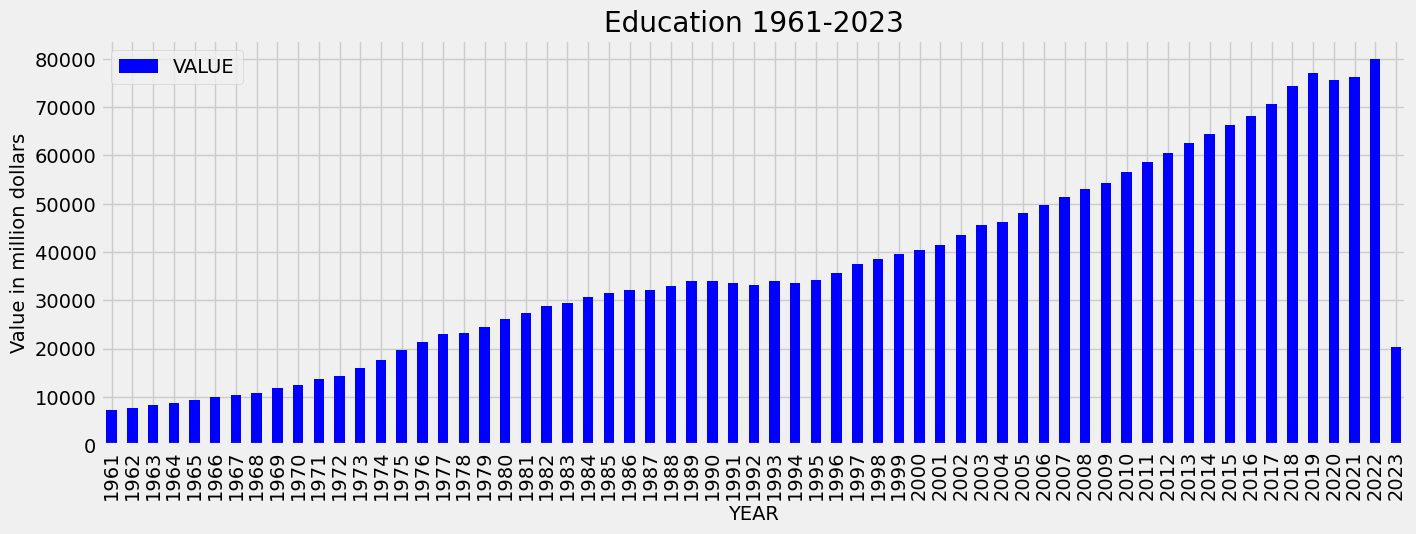

<Figure size 640x480 with 0 Axes>

In [17]:
#Plot Education [C21]
Year_Expenses_C21.plot(kind="bar", figsize=(15,5),color="b",alpha=1.0)

# Set a title for the chart
plt.title("Education 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C21.png", bbox_inches="tight")
plt.show()
plt.tight_layout()



Food

In [18]:
#Food and non-alcoholic beverages [C11]
Expenses_C11  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Food and non-alcoholic beverages [C11]", ]
Expenses_C11
Year_Expenses_C11 = Expenses_C11[["YEAR","VALUE"]]
Year_Expenses_C11=Year_Expenses_C11.set_index("YEAR")
Year_Expenses_C11

,VALUE
YEAR,
1961,152939
1962,158654
1963,162303
1964,168527
1965,172904
...,...
2019,417892
2020,449754
2021,447520


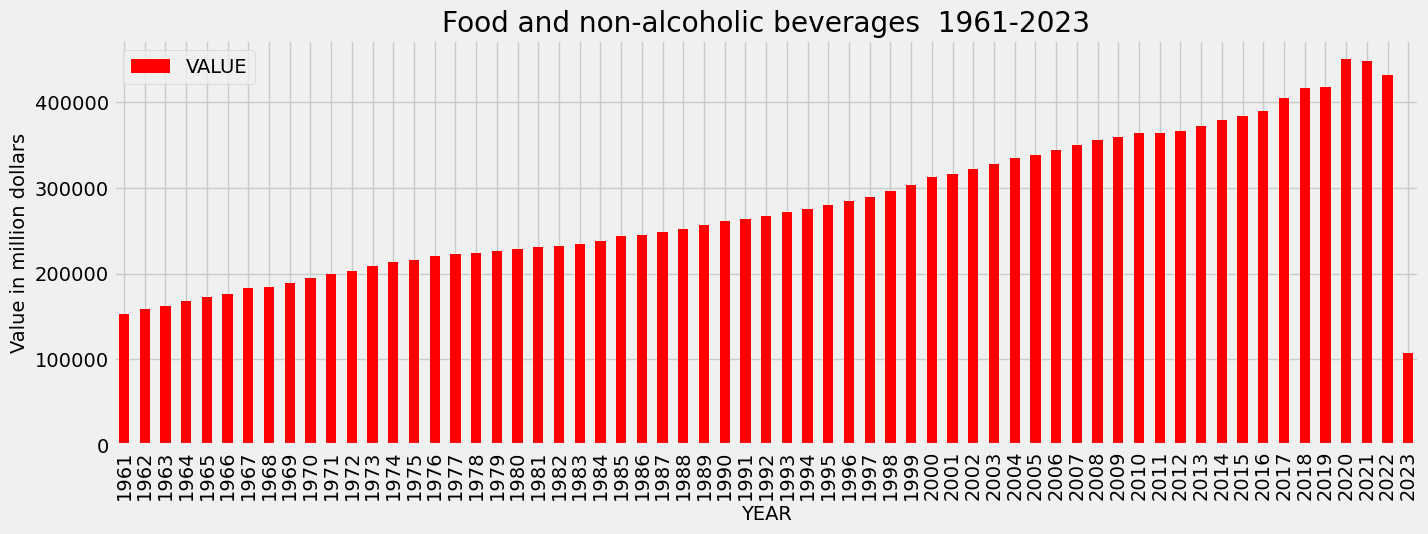

<Figure size 640x480 with 0 Axes>

In [19]:
#Plot Food and non-alcoholic beverages [C11]

Year_Expenses_C11.plot(kind="bar", figsize=(15,5),color="r",alpha=1.0)

# Set a title for the chart
plt.title("Food and non-alcoholic beverages  1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C11.png", bbox_inches="tight")
plt.show()
plt.tight_layout()

Food Service

In [20]:
#Food, beverage and accommodation services [C22]
Expenses_C22  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Food, beverage and accommodation services [C22]", ]
Expenses_C22

Year_Expenses_C22 = Expenses_C22[["YEAR","VALUE"]]
Year_Expenses_C22=Year_Expenses_C22.set_index("YEAR")
Year_Expenses_C22

,VALUE
YEAR,
1961,84105
1962,88967
1963,90644
1964,93744
1965,98775
...,...
2019,318419
2020,222441
2021,255966


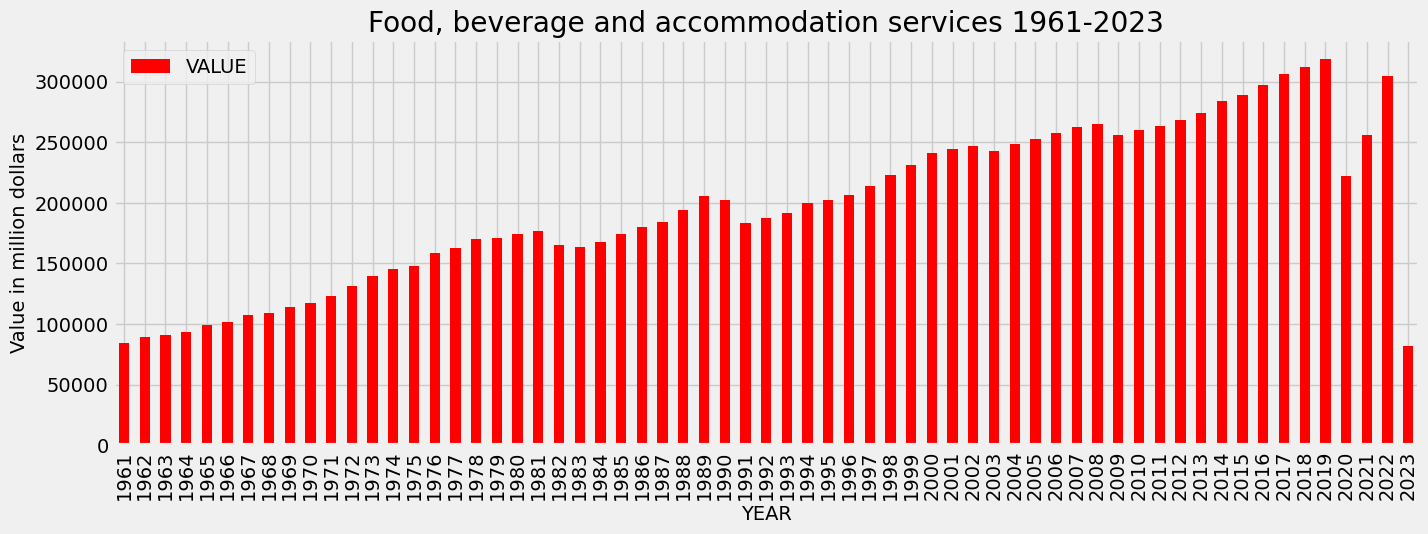

<Figure size 640x480 with 0 Axes>

In [21]:
# Plot Food, beverage and accommodation services 1961-2023

Year_Expenses_C22.plot(kind="bar", figsize=(15,5),color="r",alpha=1.0)

# Set a title for the chart
plt.title("Food, beverage and accommodation services 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C22.png", bbox_inches="tight")
plt.show()
plt.tight_layout()

Household Equipements ( Furnishing)

In [22]:
#Furnishings, household equipment and other goods and services related to the dwelling and property [C15]
Expenses_C15  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Furnishings, household equipment and other goods and services related to the dwelling and property [C15]", ]
Expenses_C15

Year_Expenses_C15 = Expenses_C15[["YEAR","VALUE"]]
Year_Expenses_C15=Year_Expenses_C15.set_index("YEAR")
Year_Expenses_C15

,VALUE
YEAR,
1961,33064
1962,34661
1963,35884
1964,38087
1965,39596
...,...
2019,261170
2020,272205
2021,291442


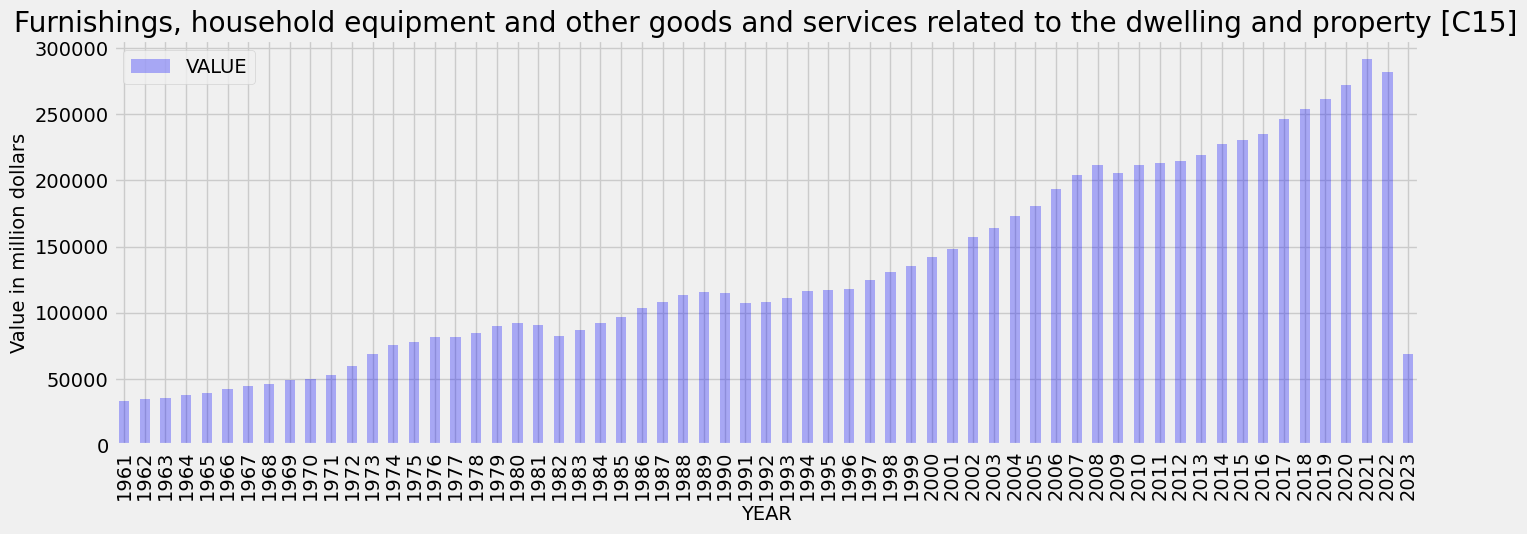

<Figure size 640x480 with 0 Axes>

In [23]:
#Plot Furnishings, household equipment and other goods and services related to the dwelling and property [C15]

Year_Expenses_C15.plot(kind="bar", figsize=(15,5),color="b",alpha=0.3)

# Set a title for the chart
plt.title("Furnishings, household equipment and other goods and services related to the dwelling and property [C15]")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C15.png", bbox_inches="tight")
plt.show()
plt.tight_layout()


Health

In [24]:
#Health [C16]
Expenses_C16  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Health [C16]", ]
Expenses_C16

Year_Expenses_C16 = Expenses_C16[["YEAR","VALUE"]]
Year_Expenses_C16=Year_Expenses_C16.set_index("YEAR")
Year_Expenses_C16

,VALUE
YEAR,
1961,29625
1962,31486
1963,33479
1964,34937
1965,37125
...,...
2019,204621
2020,186087
2021,201265


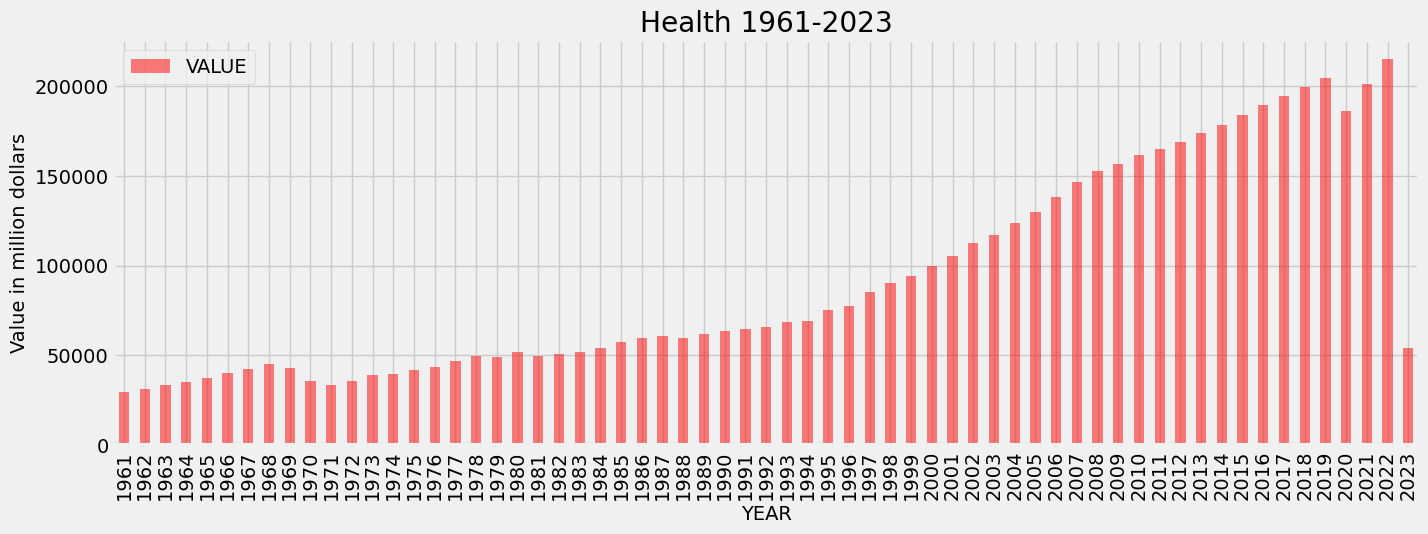

<Figure size 640x480 with 0 Axes>

In [25]:
#Plot Health [C16]


Year_Expenses_C16.plot(kind="bar", figsize=(15,5),color="r",alpha=0.5)

# Set a title for the chart
plt.title("Health 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C16.png", bbox_inches="tight")
plt.show()
plt.tight_layout()


Household final consumption

In [26]:
#Household final consumption expenditure [C]
Expenses_C  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Household final consumption expenditure [C]", ]
Expenses_C

Year_Expenses_C = Expenses_C[["YEAR","VALUE"]]
Year_Expenses_C=Year_Expenses_C.set_index("YEAR")
Year_Expenses_C

,VALUE
YEAR,
1961,749193
1962,786674
1963,819044
1964,863168
1965,912926
...,...
2019,4738960
2020,4439946
2021,4666014


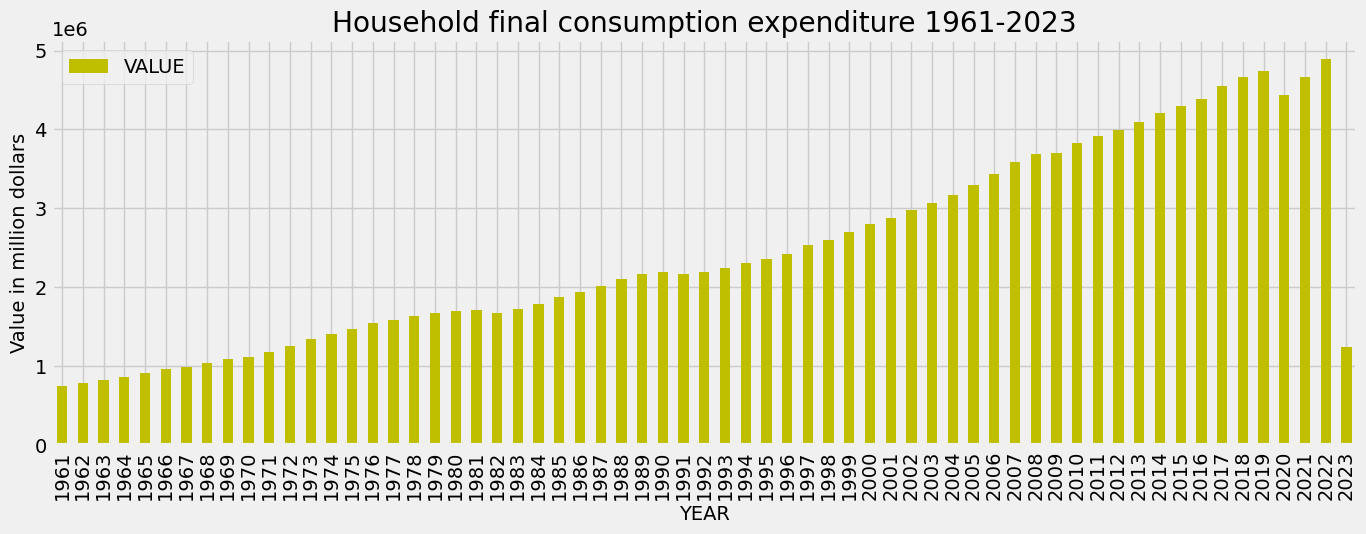

<Figure size 640x480 with 0 Axes>

In [27]:
# Plot Household final consumption expenditure 1961-2023[C]

Year_Expenses_C.plot(kind="bar", figsize=(15,5),color="y",alpha=1.0)

# Set a title for the chart
plt.title("Household final consumption expenditure 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C.png", bbox_inches="tight")
plt.show()
plt.tight_layout()



Housing, Utility

In [28]:
#Housing, water, electricity, gas and other fuels [C14]
Expenses_C14  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Housing, water, electricity, gas and other fuels [C14]", ]
Expenses_C14

Year_Expenses_C14 = Expenses_C14[["YEAR","VALUE"]]
Year_Expenses_C14=Year_Expenses_C14.set_index("YEAR")
Year_Expenses_C14

,VALUE
YEAR,
1961,247124
1962,255494
1963,264508
1964,274751
1965,284512
...,...
2019,1135754
2020,1165092
2021,1198077


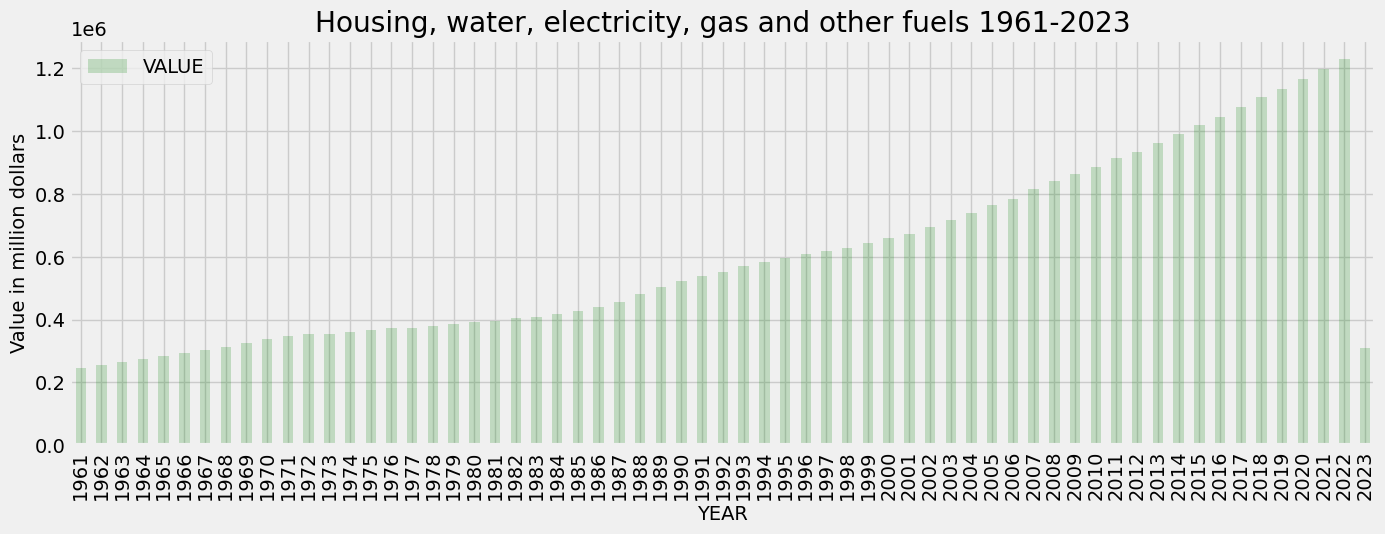

<Figure size 640x480 with 0 Axes>

In [29]:
#Plot Housing, water, electricity, gas and other fuels [C14]

Year_Expenses_C14.plot(kind="bar", figsize=(15,5),color="g",alpha=0.2)

# Set a title for the chart
plt.title("Housing, water, electricity, gas and other fuels 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C14.png", bbox_inches="tight")
plt.show()
plt.tight_layout()



Insurance

In [30]:
#Insurance and financial services [C23]
Expenses_C23  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Insurance and financial services [C23]", ]
Expenses_C23

Year_Expenses_C23 = Expenses_C23[["YEAR","VALUE"]]
Year_Expenses_C23=Year_Expenses_C23.set_index("YEAR")
Year_Expenses_C23

,VALUE
YEAR,
1961,33956
1962,35294
1963,37504
1964,38951
1965,40992
...,...
2019,455979
2020,468283
2021,503981


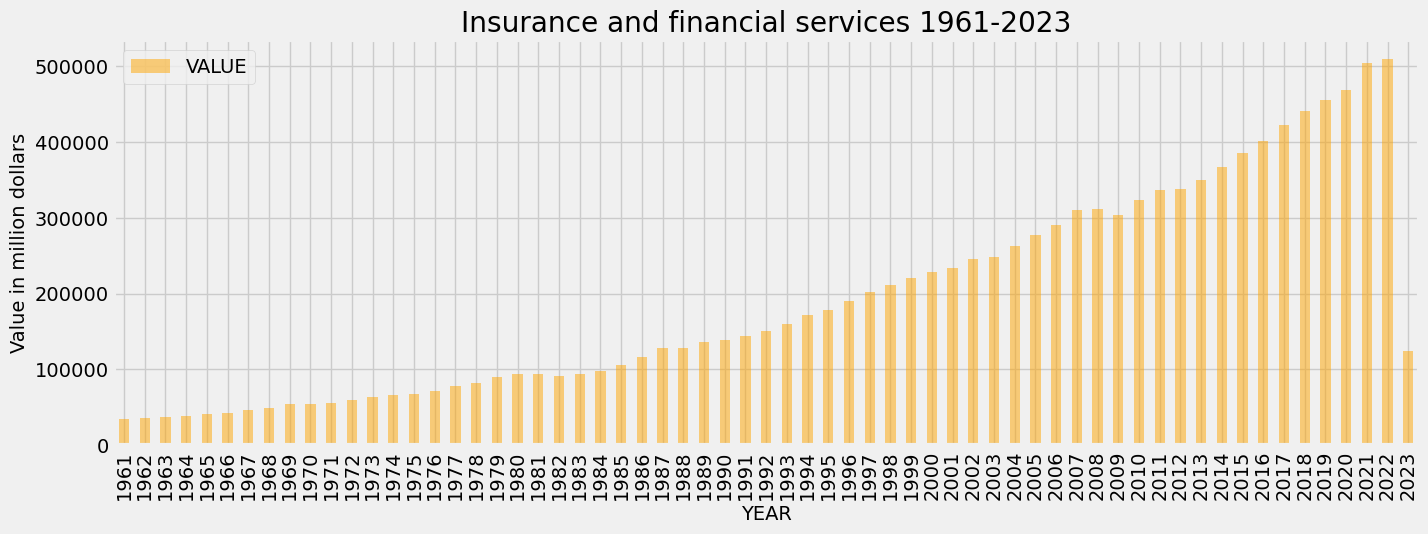

<Figure size 640x480 with 0 Axes>

In [31]:
# Plot Insurance and financial services [C23]
Year_Expenses_C23.plot(kind="bar", figsize=(15,5),color="orange",alpha=0.5)

# Set a title for the chart
plt.title("Insurance and financial services 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C23.png", bbox_inches="tight")
plt.show()
plt.tight_layout()

Miscellaneous goods

In [32]:
#Miscellaneous goods and services [C24]
Expenses_C24  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Miscellaneous goods and services [C24]", ]
Expenses_C24

Year_Expenses_C24 = Expenses_C24[["YEAR","VALUE"]]
Year_Expenses_C24=Year_Expenses_C24.set_index("YEAR")
Year_Expenses_C24

,VALUE
YEAR,
1961,33266
1962,35251
1963,37091
1964,39487
1965,42256
...,...
2019,245850
2020,222761
2021,236481


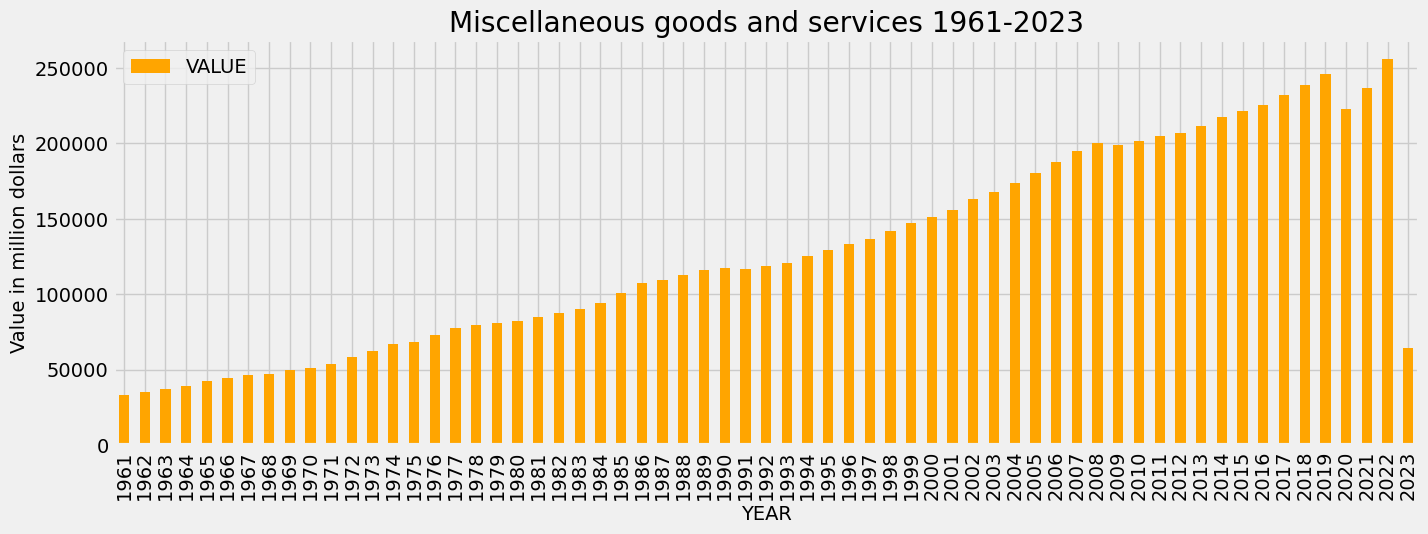

<Figure size 640x480 with 0 Axes>

In [33]:
#PlotMiscellaneous goods and service [C24]


Year_Expenses_C24.plot(kind="bar", figsize=(15,5),color="orange",alpha=1.0)

# Set a title for the chart
plt.title("Miscellaneous goods and services 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C24.png", bbox_inches="tight")
plt.show()
plt.tight_layout()

Net expenditure abroad

In [34]:
#Net expenditure abroad [C25]
Expenses_C25  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Net expenditure abroad [C25]", ]
Expenses_C25

Year_Expenses_C25 = Expenses_C25[["YEAR","VALUE"]]
Year_Expenses_C25=Year_Expenses_C25.set_index("YEAR")
Year_Expenses_C25



,VALUE
YEAR,
1961,-4070
1962,-9763
1963,-12350
1964,-11084
1965,-11906
...,...
2019,14260
2020,-10996
2021,-27792


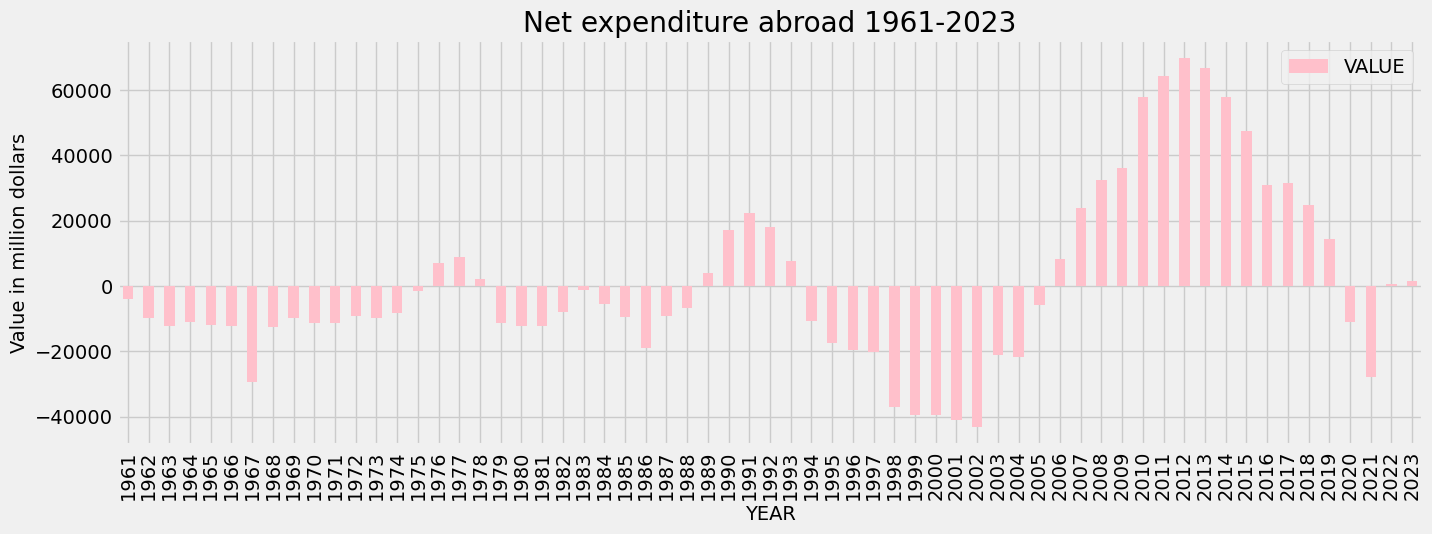

<Figure size 640x480 with 0 Axes>

In [35]:
#Plot Net expenditure abroad [C25]


Year_Expenses_C25.plot(kind="bar", figsize=(15,5),color="pink",alpha=1.0)

# Set a title for the chart
plt.title("Net expenditure abroad 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C25.png", bbox_inches="tight")
plt.show()
plt.tight_layout()

Recreation

In [36]:
#Recreation and culture [C19]
Expenses_C19  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Recreation and culture [C19]", ]
Expenses_C19

Year_Expenses_C19 = Expenses_C19[["YEAR","VALUE"]]
Year_Expenses_C19=Year_Expenses_C19.set_index("YEAR")
Year_Expenses_C19

,VALUE
YEAR,
1961,18676
1962,20220
1963,20959
1964,22490
1965,24941
...,...
2019,384171
2020,355971
2021,384287


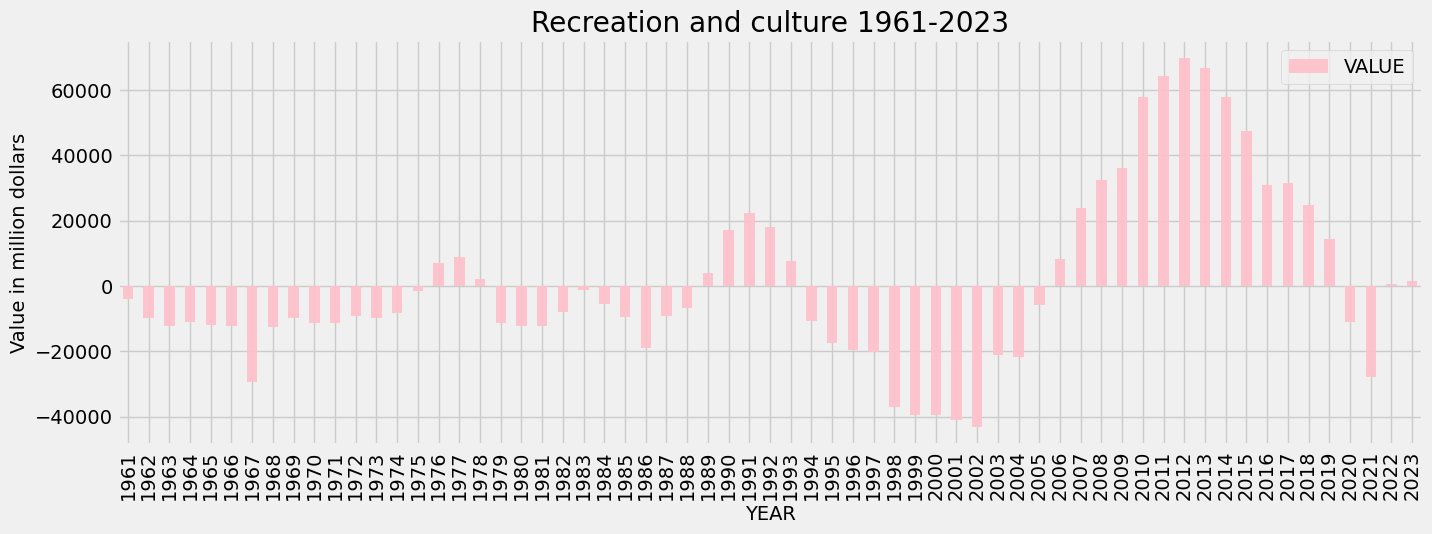

<Figure size 640x480 with 0 Axes>

In [37]:
#Plot Recreation and culture[C19]


Year_Expenses_C25.plot(kind="bar", figsize=(15,5),color="pink",alpha=0.9)

# Set a title for the chart
plt.title("Recreation and culture 1961-2023")

plt.ylabel("Value in million dollars")

# Show plot
plt.savefig("Year_Expenses_C19.png", bbox_inches="tight")
plt.show()
plt.tight_layout()

Transport

In [38]:
#Transport [C17]
Expenses_C17  = rename_clean_df.loc[rename_clean_df["Expenditures_(Millions_Dallars)"] == "Transport [C17]", ]
Expenses_C17

Year_Expenses_C17 = Expenses_C17[["YEAR","VALUE"]]
Year_Expenses_C17=Year_Expenses_C17.set_index("YEAR")
Year_Expenses_C17

,VALUE
YEAR,
1961,83298
1962,91931
1963,100714
1964,111458
1965,123554
...,...
2019,734179
2020,579575
2021,614301


Preparing for pre/post covid data

In [39]:
# Picking only the years i want from the data-k
filter_data = clean_df.loc[(clean_df["REF_YEAR"] == 2022)|
                           (clean_df["REF_YEAR"] == 2021)|
                           (clean_df["REF_YEAR"] == 2020)|
                           (clean_df["REF_YEAR"] == 2019)|
                           (clean_df["REF_YEAR"] == 2018)
]

In [40]:
# Checking the data-k
filter_data

,REF_YEAR,Estimates,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
855,2018,"Alcoholic beverages, tobacco and cannabis [C12]",324,24,162741,0.0,0.0,0.0,0
856,2018,Clothing and footwear [C13],324,24,199117,0.0,0.0,0.0,0
857,2018,Communications [C18],324,24,127348,0.0,0.0,0.0,0
858,2018,Education [C21],324,24,74365,0.0,0.0,0.0,0
859,2018,Food and non-alcoholic beverages [C11],324,24,416591,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
925,2022,Insurance and financial services [C23],324,24,509040,0.0,0.0,0.0,0
926,2022,Miscellaneous goods and services [C24],324,24,255727,0.0,0.0,0.0,0
927,2022,Net expenditure abroad [C25],324,24,492,0.0,0.0,0.0,0
928,2022,Recreation and culture [C19],324,24,407300,0.0,0.0,0.0,0


In [41]:
# Getting rid of the partial strings that i don't want-k
filter_data['Estimates'] = filter_data['Estimates'].map(lambda x: x.rstrip('[]C0123456789'))


In [42]:
#checking the data
filter_data.head()

,REF_YEAR,Estimates,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
855,2018,"Alcoholic beverages, tobacco and cannabis",324,24,162741,0.0,0.0,0.0,0
856,2018,Clothing and footwear,324,24,199117,0.0,0.0,0.0,0
857,2018,Communications,324,24,127348,0.0,0.0,0.0,0
858,2018,Education,324,24,74365,0.0,0.0,0.0,0
859,2018,Food and non-alcoholic beverages,324,24,416591,0.0,0.0,0.0,0


In [43]:
# Making Estimate the index
filter_data.set_index("Estimates", inplace=True)


In [44]:
# Checking the data
filter_data.tail(20)

,REF_YEAR,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
Estimates,,,,,,,,
Insurance and financial services,2021,324,24,503981,0.0,0.0,0.0,0
Miscellaneous goods and services,2021,324,24,236481,0.0,0.0,0.0,0
Net expenditure abroad,2021,324,24,-27792,0.0,0.0,0.0,0
Recreation and culture,2021,324,24,384287,0.0,0.0,0.0,0
Transport,2021,324,24,614301,0.0,0.0,0.0,0
"Alcoholic beverages, tobacco and cannabis",2022,324,24,171608,0.0,0.0,0.0,0
Clothing and footwear,2022,324,24,224931,0.0,0.0,0.0,0
Communications,2022,324,24,156765,0.0,0.0,0.0,0
Education,2022,324,24,79914,0.0,0.0,0.0,0


In [45]:
# Checking the index, checking for spaces, for locating later.
filter_data.index.unique()

Index(['Alcoholic beverages,  tobacco and cannabis ', 'Clothing and footwear ',
       'Communications ', 'Education ', 'Food and non-alcoholic beverages ',
       'Food, beverage and accommodation services ',
       'Furnishings, household equipment and other goods and services related to the dwelling and property ',
       'Health ', 'Household final consumption expenditure ',
       'Housing, water, electricity, gas and other fuels ',
       'Insurance and financial services ',
       'Miscellaneous goods and services ', 'Net expenditure abroad ',
       'Recreation and culture ', 'Transport '],
      dtype='object', name='Estimates')

In [46]:
filter_data_net = filter_data

In [47]:
# Dropping the HouseHold Final Consumption as it is just the sum of all expense.
filter_data = filter_data.drop(['Household final consumption expenditure '], axis=0)

In [48]:
# Renaming one of the index, since it is too long.
filter_data.rename(index={'Furnishings, household equipment and other goods and services related to the dwelling and property ':"Household Equipment"}, inplace= True)

In [49]:
#2018
data2018 = filter_data.loc[filter_data["REF_YEAR"]== 2018]
#2019
data2019 = filter_data.loc[filter_data["REF_YEAR"]== 2019]
#2020
data2020 = filter_data.loc[filter_data["REF_YEAR"]== 2020]
#2021
data2021 = filter_data.loc[filter_data["REF_YEAR"]== 2021]
#2022
data2022 = filter_data.loc[filter_data["REF_YEAR"]== 2022]


In [50]:
# Renaming the VALUE columns according to the year of the data 
data2022.rename({'VALUE': '2022V'},axis='columns', inplace= True)

data2021.rename({'VALUE': '2021V'},axis='columns', inplace= True)

data2020.rename({'VALUE': '2020V'},axis='columns', inplace= True)

data2019.rename({'VALUE': '2019V'},axis='columns', inplace= True)

data2018.rename({'VALUE': '2018V'},axis='columns', inplace= True)

# Picking only the data i want
df2022 = data2022[["2022V"]]

df2021 = data2021[["2021V"]]

df2020 = data2020[["2020V"]]

df2019 = data2019[["2019V"]]

df2018 = data2018[["2018V"]]



In [51]:
# Merging all the data into one, to create a comaprison of Year 2018 ~2022
merge = df2022.join(df2021, how = "outer")
merge = merge.join(df2020, how = "outer")
merge = merge.join(df2019, how = "outer")
merge = merge.join(df2018, how = "outer")

In [52]:
# Visualizing the data
merge

,2022V,2021V,2020V,2019V,2018V
Estimates,,,,,
"Alcoholic beverages, tobacco and cannabis",171608,173929,171243,162677,162741
Clothing and footwear,224931,193730,163667,201448,199117
Communications,156765,149066,138396,133951,127348
Education,79914,76364,75572,77016,74365
Food and non-alcoholic beverages,431236,447520,449754,417892,416591
"Food, beverage and accommodation services",304513,255966,222441,318419,311833
Household Equipment,281618,291442,272205,261170,254043
Health,214867,201265,186087,204621,199588
"Housing, water, electricity, gas and other fuels",1229010,1198077,1165092,1135754,1109154


In [53]:
#Checking for all the index
merge.index

Index(['Alcoholic beverages,  tobacco and cannabis ', 'Clothing and footwear ',
       'Communications ', 'Education ', 'Food and non-alcoholic beverages ',
       'Food, beverage and accommodation services ', 'Household Equipment',
       'Health ', 'Housing, water, electricity, gas and other fuels ',
       'Insurance and financial services ',
       'Miscellaneous goods and services ', 'Net expenditure abroad ',
       'Recreation and culture ', 'Transport '],
      dtype='object', name='Estimates')

Closer look of the effect of Covid

In [54]:
matplotlib.style.use('fivethirtyeight')

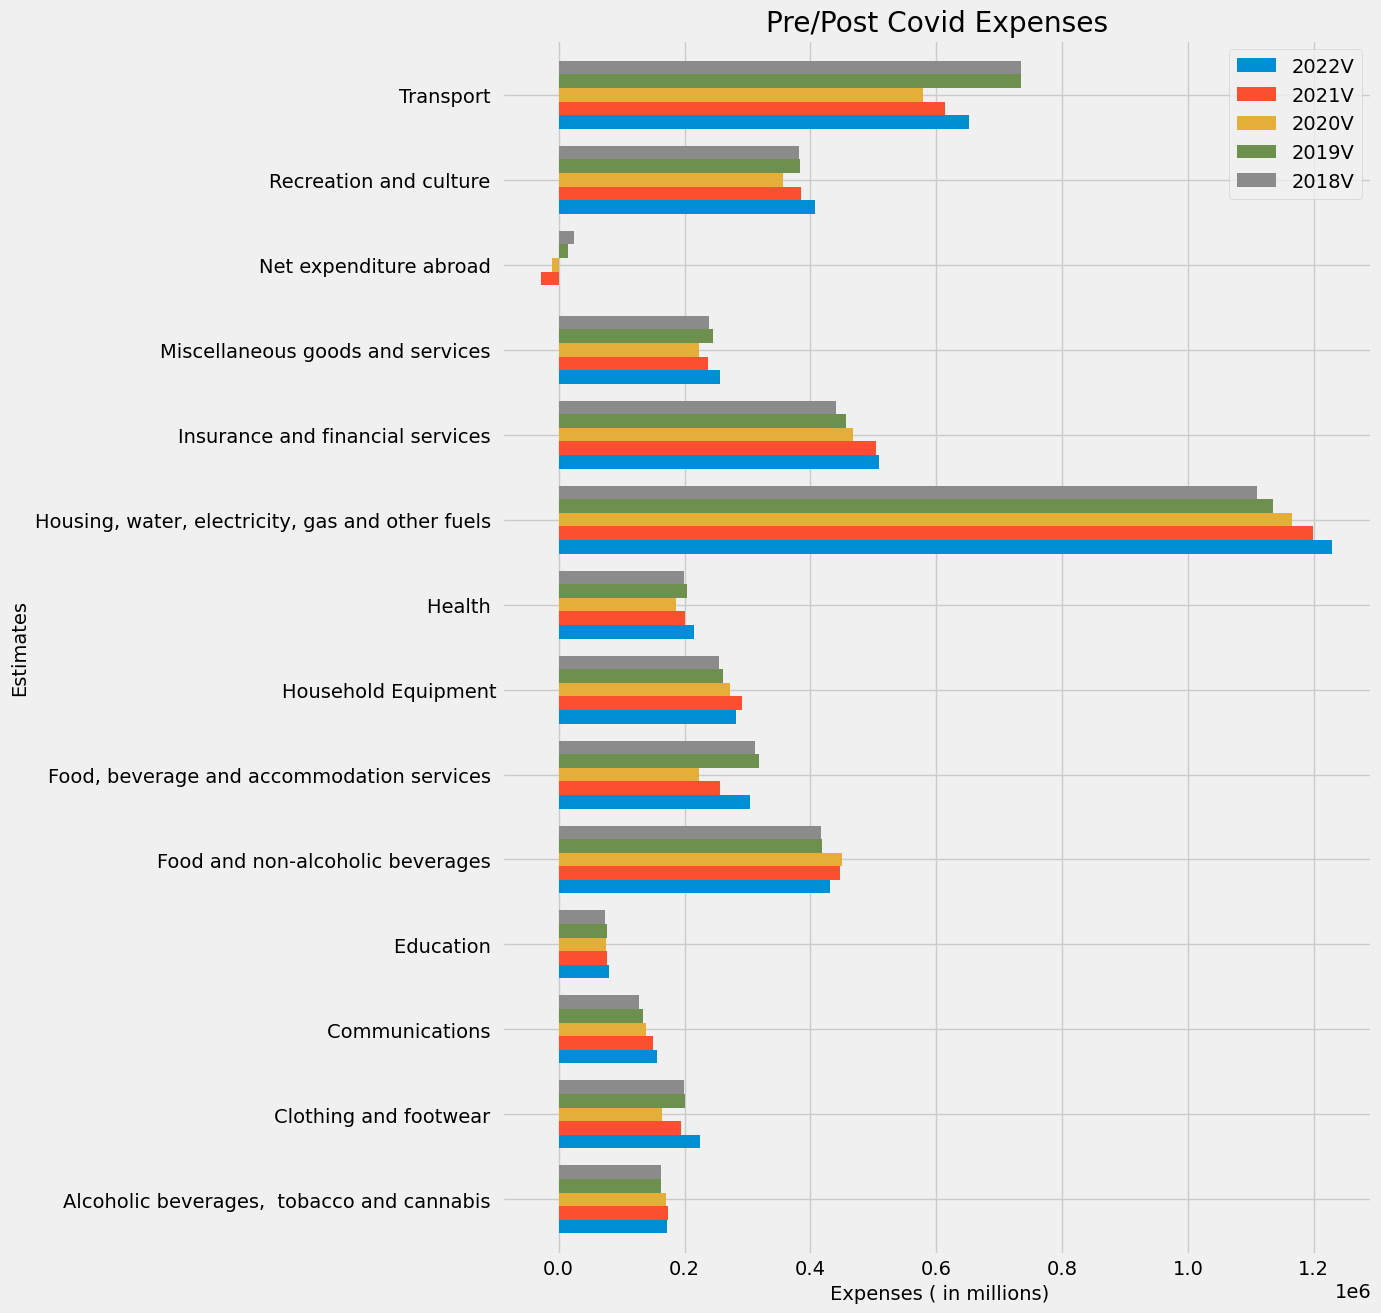

In [55]:
# Bar chart of year 2018 ~ 2022 expenditure

plot1 =merge.plot(kind = "barh" ,xlabel= " Expenses ( in millions)", width = 0.8, figsize=(10,15), title= 'Pre/Post Covid Expenses')
matplotlib.style.use('fivethirtyeight')
plt.savefig("Covid_Expenses.png", bbox_inches="tight")
plt.show()

Category that did not change after covid:
Insurances and financial services
Housing and Utilities
Communications



In [56]:
# Checking the data
merge

,2022V,2021V,2020V,2019V,2018V
Estimates,,,,,
"Alcoholic beverages, tobacco and cannabis",171608,173929,171243,162677,162741
Clothing and footwear,224931,193730,163667,201448,199117
Communications,156765,149066,138396,133951,127348
Education,79914,76364,75572,77016,74365
Food and non-alcoholic beverages,431236,447520,449754,417892,416591
"Food, beverage and accommodation services",304513,255966,222441,318419,311833
Household Equipment,281618,291442,272205,261170,254043
Health,214867,201265,186087,204621,199588
"Housing, water, electricity, gas and other fuels",1229010,1198077,1165092,1135754,1109154


In [57]:
#Picking Education
edu = merge.iloc[[3]]
edu
# Changing the order
edu = edu[['2018V','2019V','2020V','2021V','2022V']]


In [58]:
edu2 =edu.transpose()

edu2

Estimates,Education
2018V,74365
2019V,77016
2020V,75572
2021V,76364
2022V,79914


<Axes: title={'center': 'Education'}, xlabel='Years'>

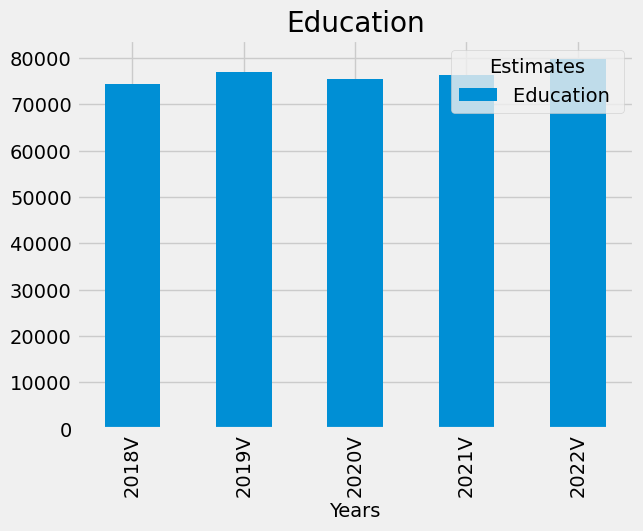

In [59]:
#Plotting
edu2.plot(kind = "bar" ,xlabel= "Years", title= 'Education')

In [60]:
filter_data_net.index.unique()

Index(['Alcoholic beverages,  tobacco and cannabis ', 'Clothing and footwear ',
       'Communications ', 'Education ', 'Food and non-alcoholic beverages ',
       'Food, beverage and accommodation services ',
       'Furnishings, household equipment and other goods and services related to the dwelling and property ',
       'Health ', 'Household final consumption expenditure ',
       'Housing, water, electricity, gas and other fuels ',
       'Insurance and financial services ',
       'Miscellaneous goods and services ', 'Net expenditure abroad ',
       'Recreation and culture ', 'Transport '],
      dtype='object', name='Estimates')

In [61]:
final_expense = filter_data_net.loc['Household final consumption expenditure ']

final_expense

,REF_YEAR,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
Estimates,,,,,,,,
Household final consumption expenditure,2018,324,24,4669505,0.0,0.0,0.0,0
Household final consumption expenditure,2019,324,24,4738960,0.0,0.0,0.0,0
Household final consumption expenditure,2020,324,24,4439946,0.0,0.0,0.0,0
Household final consumption expenditure,2021,324,24,4666014,0.0,0.0,0.0,0
Household final consumption expenditure,2022,324,24,4887941,0.0,0.0,0.0,0


In [62]:
final_expense.set_index('REF_YEAR')

,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
REF_YEAR,,,,,,,
2018,324,24,4669505,0.0,0.0,0.0,0
2019,324,24,4738960,0.0,0.0,0.0,0
2020,324,24,4439946,0.0,0.0,0.0,0
2021,324,24,4666014,0.0,0.0,0.0,0
2022,324,24,4887941,0.0,0.0,0.0,0


In [63]:
# Define a function to create Linear Regression plots
def linger_regression_plot(x,y,title,location):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,location,fontsize=18,color="red")
    plt.xlabel('Years')
    plt.ylabel(title)
    plt.xticks(x,rotation = 'vertical')
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [64]:
x = final_expense['REF_YEAR']
y = final_expense['VALUE']

The r-value is: 0.12656170020302893


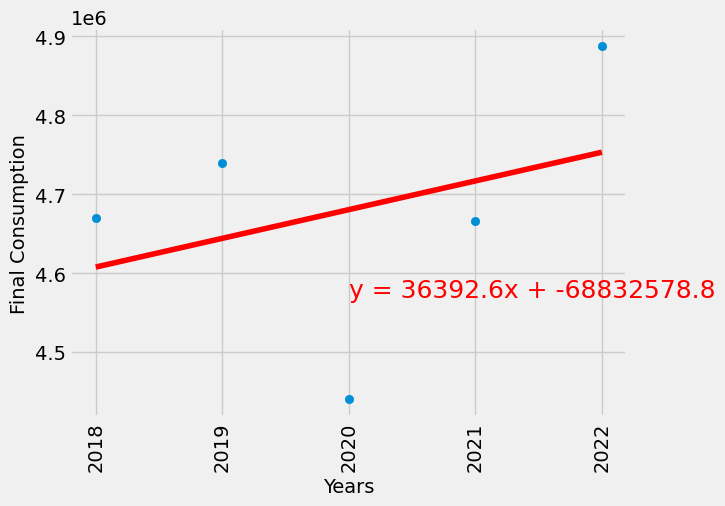

In [65]:
linger_regression_plot(x, y, "Final Consumption", (2020,4569505) )


In [66]:
# As we can see, there is clearly an upward linear relationship

In [67]:
#checking the expenses data for how many rows
Year_Expenses_C

,VALUE
YEAR,
1961,749193
1962,786674
1963,819044
1964,863168
1965,912926
...,...
2019,4738960
2020,4439946
2021,4666014


In [68]:
#Filtering the data for pre covid
pre_covid_expense = Year_Expenses_C.iloc[54:58]
post_covid_expense = Year_Expenses_C.iloc[58:62]

In [69]:
# Setting up for T-Test
pop1 =pre_covid_expense.reset_index(drop=True)
pop2 = post_covid_expense.reset_index(drop=True)

In [71]:
# Using course material to help with graph
def gendata(loc1=0, loc2=0):
    population1 = pop1
    population2 = pop2

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="pre_covid")
    plt.scatter(range(len(population2)), population2, label="post_covid")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="pre_covid")
    plt.hist(population2, 10, density=True, alpha=0.7, label="post_covid")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

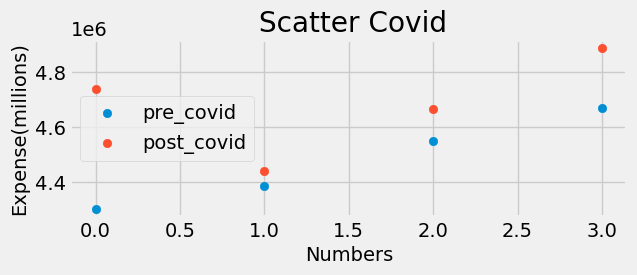

In [81]:
# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(pop1)), pop1, label="pre_covid")
plt.scatter(range(len(pop2)), pop2, label="post_covid")
plt.title(" Scatter Covid")
plt.xlabel("Numbers")
plt.ylabel("Expense(millions)")
plt.legend(loc = 'center left')

In [89]:
# Assuming they do not have equal variance 
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=array([-1.66144442]), pvalue=array([0.14842672]))

In [ ]:
#Pvaule > 0.05 so we have failed 